# Performance Evaluation of Machine Learning Algorithms for Credit Card Fraud Detection

Credit card transactions have become common place today and so is the frauds associated with it. One of the most common modus operandi to carry out fraud is to obtain the card information illegally and use it to make online purchases. For credit card companies and merchants, it is in-feasible to detect these fraudulent transactions among thousands of normal transactions. If sufficient data is collected and made available, achine learning algorithms can be applied to solve this problem. In this work, popular supervised and unsupervised machine learning algorithms have been applied to detect credit card frauds in a highly imbalanced dataset. It was found that unsupervised machine learning algorithms can handle the skewness and give best classification results.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Dara preparation)
#default = pd.read_excel('UCI_Credit_Card.csv',skiprows=[0],index_col="ID")
default = pd.read_csv('UCI_Credit_Card.csv',index_col="ID")
default.rename(columns=lambda x: x.lower(), inplace=True)
default.head()

# Credit Card Fraud Detection

Credit card fraud detection mechanism depends on the fraud mechanism itself. There are several vectors by which a fraud can be committed. However, these can be classified in two main categories. First of them is the frauds caused by illegally obtaining the possession of physical card. This can not only be done by stealing the card from actual owner before or after delivery but by many other methods also where a new cloned card is created that can act as counterfeit for actual card. The other category of frauds is caused by obtaining credit card information illegally. This can be done while taking imprints of cards at hotels, shoulder surfing, phishing among others . Sometimes, actual allottee may try to bluff the company by denying the transaction made by him. In all cases, if an extra authentication measure like OTP has been implemented then its security also must be circumvented. A computational Fraud Detection System (FDS) is designed to detect all types of frauds by differentiating the behavior of fraudster from actual user. 

In [46]:
# Dara preparation)
#default = pd.read_excel('UCI_Credit_Card.csv',skiprows=[0],index_col="ID")
default = pd.read_csv('UCI_Credit_Card.csv',index_col="ID")
default.rename(columns=lambda x: x.lower(), inplace=True)
default.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Base values: female, other_education,not_married
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')

default.drop('education' , axis=1, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex' , axis=1, inplace=True)

default['married'] = (default['marriage']==1).astype('int')
default.drop('marriage' , axis=1, inplace=True)

#for pay features if the <=0 then it means it was not delayed
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    default.loc[default[p]<=0, p] = 0

default.rename(columns={'default payment next month':'default'},inplace=True)
default.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [5]:
default.columns

filename="cc.csv"
default.to_csv(filename)


In [6]:
target_name = 'default.payment.next.month'
x = default.drop(target_name, axis=1)
robust_scaler = RobustScaler()
x = robust_scaler.fit_transform(x)
y = default[target_name]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=123, stratify=y)

In [13]:
x

array([[-0.63157895, -0.76923077,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.10526316, -0.61538462,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26315789,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.57894737,  0.23076923,  4.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.31578947,  0.53846154,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.47368421,  0.92307692,  0.        , ...,  0.        ,
         1.        ,  1.        ]])

In [8]:
def CMatrix(CM, labels=['pay' , 'default.payment.next.month']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name= 'TRUE'
    df.columns.name= 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [9]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                      columns=['NULL','LogisticReg','ClassTree','NaiveBayes'])

In [10]:
# Null model
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test,y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,pay,default.payment.next.month,Total
TRUE,,,
pay,3505,0,3505
default.payment.next.month,995,0,995
Total,4500,0,4500


In [11]:
#### logistic regression####
from sklearn import datasets
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [12]:
#  Logistic Regression
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(x_train, y_train)

# 4. Evalute the model
y_pred_test = logistic_regression.predict(x_test)
metrics.loc['accuracy','logisticReg'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','logisticReg'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','logisticReg'] = recall_score(y_pred=y_pred_test,y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [13]:
# Classification Trees
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(x_train, y_train)

# 4. Evalute the model
y_pred_test = class_tree.predict(x_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test,y_true=y_test)
# Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default.payment.next.month,Total
TRUE,,,
pay,3185,320,3505
default.payment.next.month,634,361,995
Total,3819,681,4500


In [14]:
# Naive Bayes Classifier
# 1. Import the estimator object (model)
from sklearn.naive_bayes import GaussianNB
#l0
# 2. Create an instance of the estimator
NBC = GaussianNB()

# 3. Use the trainning data to train the estimator
NBC.fit(x_train, y_train)

# 4. Evalute the model
y_pred_test = NBC.predict(x_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test,y_true=y_test)
# Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default.payment.next.month,Total
TRUE,,,
pay,2912,593,3505
default.payment.next.month,439,556,995
Total,3351,1149,4500


In [17]:
y_train

ID
8097     0
27340    0
29441    0
8119     1
21455    0
        ..
3229     0
14563    1
22974    1
4770     1
13417    0
Name: default.payment.next.month, Length: 25500, dtype: int64

In [15]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,77.888889,NaN,78.8,77.066667
precision,0.0,NaN,53.010279,48.389904
recall,0.0,NaN,36.281407,55.879397


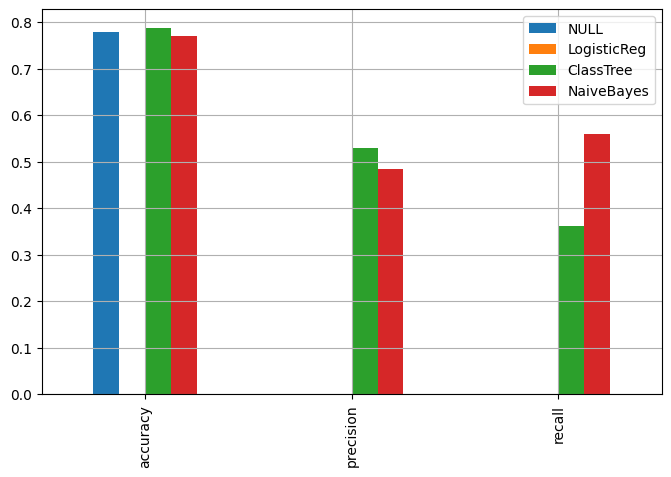

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='bar',ax=ax)
ax.grid();

In [17]:
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test,
                                                                probas_pred=NBC.predict_proba(x_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test,
                                                               probas_pred=logistic_regression.predict_proba(x_test)[:,1])


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

NameError: name 'precision_lr' is not defined

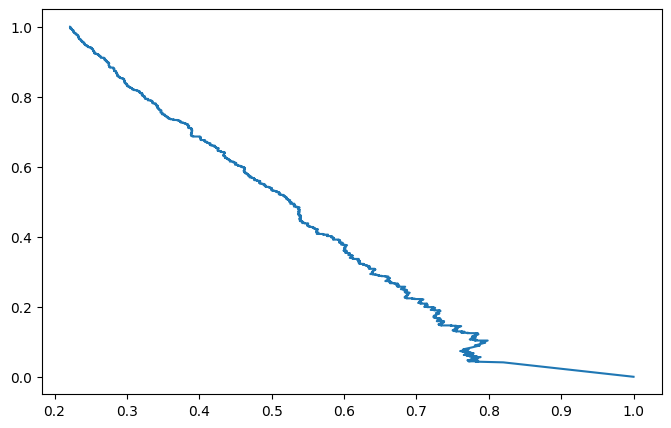

In [18]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
#ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

NameError: name 'thresholds_lr' is not defined

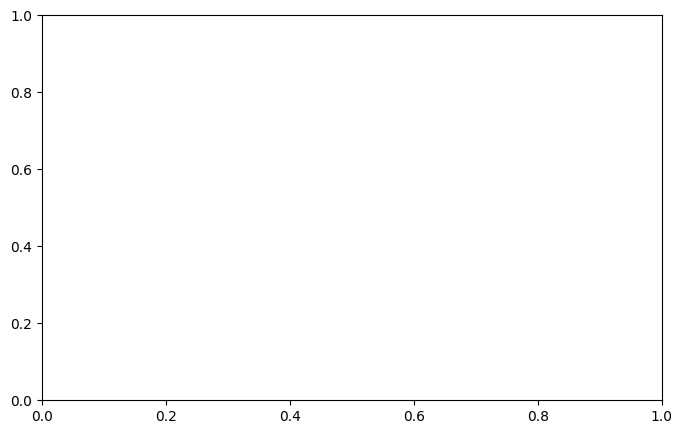

In [19]:
# Confusion matrix for modified Logistic Regression Classifier
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr[:],precision_lr[1:],label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel(' Precision Recall')
ax.set_title('Logistic Regression Classifier:Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [20]:
# Classifier with threshold of 0.2
y_pred_proba = logistic_regression.predict_proba(x_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')
# confusion matrix
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
print("Recall: ",100*recall_score(y_pred=y_pred_test,y_true=y_test))
print("Precision: ",100*precision_score(y_pred=y_pred_test,y_true=y_test))
CMatrix(CM)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [21]:
# Making individual Predictions
def make_ind_prediction(new_data):
    data = new_data.values.reshape(1, -1)
    data = robust_scaler.transform(data)
    prob = logistic_regression.predict_proba(data)[0][1]
    if prob >= 0.2:
        return 'Will default'
    else:
        return 'Will pay'

In [22]:
pay = default[default['default.payment.next.month']==0]

In [23]:
pay.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
5,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1
6,50000.0,37,0,0,0,0,0,0,64400.0,57069.0,...,657.0,1000.0,1000.0,800.0,0,1,0,0,1,0
7,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,...,38000.0,20239.0,13750.0,13770.0,0,1,0,0,1,0


In [24]:
[[90000,34,0,0,0,0,0,0,29239,14027,1000,1000,1000,5000,0,0,1,0,0,0]]

[[90000,
  34,
  0,
  0,
  0,
  0,
  0,
  0,
  29239,
  14027,
  1000,
  1000,
  1000,
  5000,
  0,
  0,
  1,
  0,
  0,
  0]]

In [25]:
pay = default[default['default.payment.next.month']==1]

In [26]:
pay.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
2,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
14,70000.0,30,1,2,2,0,0,2,65802.0,67369.0,...,3000.0,3000.0,1500.0,0.0,1,0,1,0,1,0
17,20000.0,24,0,0,2,2,2,2,15376.0,18010.0,...,1500.0,0.0,1650.0,0.0,1,1,0,0,1,0
22,120000.0,39,0,0,0,0,0,0,316.0,316.0,...,0.0,632.0,316.0,0.0,1,0,1,0,0,1


In [27]:
from collections import OrderedDict
new_customer = pd.Series({'limit_bal':4000, 'áge':50, 
                          'bill_amt1':500, 'bill_amt2':35509,'bill_amt3':689,'bill_amt4':0,'bill_amt5':0,'bill_amt6':0,
                                 'pay_amt1':0, 'pay_amt2':33509, 'pay_amt3':0, 'pay_amt4':0, 'pay_amt5':0, 'pay_amt6':0,
                                 'male':1, 'grad_school':0, 'university':1, 'high_school':0, 'married':1,
                                 'pay_1':-1, 'pay_2':-1, 'pay_3':-1, 'pay_4':0, 'pay_5':-1, 'pay_6':0})
new_customer = pd.DataFrame(new_customer).transpose()
make_ind_prediction(new_customer)

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [28]:
pay_count = no_pay_count = 0
for x in default.index[1:]:
    if make_ind_prediction(default.loc[x].drop('default.payment.next.month')) == 'Will pay':
        pay_count+=1
    else:
        no_pay_count+=1
print('pay:',pay_count)
print('Nopay:',no_pay_count)

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  "X does not have valid feature names, but"


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# Neural Networks (NN) and Artificial Neural Networks
(ANN) - For fraud detection, the commonly used method are NNs. NN recognize related patterns, predict values based on associative memory of patterns it learnt. An ANN consists of inert-connected artificial neurons. ANNs are Feed-Forward Neural Networks (NN) that use the backpropagation algorithm for training.



In [29]:

pay.shape

(6636, 26)

In [30]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

x1_train = x_train
x1_test = x_test
y1_train = y_train
y1_test = y_test

25500 4500 25500 4500


# ANN Implementation with Perceptron
A perceptron is a simple model of a biological neuron in an artificial neural network. ... The perceptron algorithm was designed to classify visual inputs, categorizing subjects into one of two types and separating groups with a line. Classification is an important part of machine learning and image processing.

In [31]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

p = Perceptron(random_state=42,
              max_iter=10,
              tol=0.001)
p.fit(x_train, y_train)
y_pred = p.predict(x_test)
confusion_matrix(y_pred=y_pred,y_true=y_test)
ann_accuracy = accuracy_score(y_pred=y_pred,y_true=y_test)
print('ANN Accuracy = ',ann_accuracy)



ANN Accuracy =  0.7386666666666667


# Deep Learning with Stochastic Gradient Descent
Deep Learning (DL) - DL is based on a multi-layer perceptron network trained using a stochastic gradient descent with. In, authors proposed a deep learning based on auto-encoder (AE) which is an unsupervised learning algorithm that applies backpropagation by setting the inputs equal to the outputs.

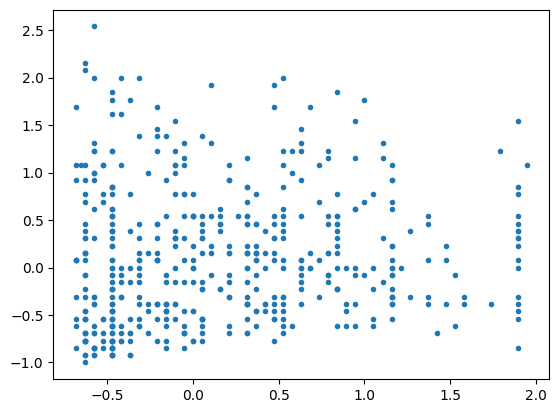

Number of examples in training set =  4050
Number of examples in testing set =  450


In [32]:
# importing dependencies 
import numpy as np 
import matplotlib.pyplot as plt 
import statistics

 
data = x_test # you can work with x_test,x_train,y_test,y_train

# visualising data 
plt.scatter(data[:500, 0], data[:500, 1], marker = '.') 
plt.show() 

# train-test-split 
data = np.hstack((np.ones((data.shape[0], 1)), data)) 

split_factor = 0.90
split = int(split_factor * data.shape[0]) 

X_train = data[:split, :-1] 
y_train = data[:split, -1].reshape((-1, 1)) 
X_test = data[split:, :-1] 
y_test = data[split:, -1].reshape((-1, 1)) 

print("Number of examples in training set = % d"%(X_train.shape[0])) 
print("Number of examples in testing set = % d"%(X_test.shape[0])) 


In [33]:
# linear regression using "mini-batch" gradient descent 
# function to compute hypothesis / predictions 
def hypothesis(X, theta): 
	return np.dot(X, theta) 

# function to compute gradient of error function w.r.t. theta 
def gradient(X, y, theta): 
	h = hypothesis(X, theta) 
	grad = np.dot(X.transpose(), (h - y)) 
	return grad 

# function to compute the error for current values of theta 
def cost(X, y, theta): 
	h = hypothesis(X, theta) 
	J = np.dot((h - y).transpose(), (h - y)) 
	J /= 2
	return J[0] 

# function to create a list containing mini-batches 
def create_mini_batches(X, y, batch_size): 
	mini_batches = [] 
	data = np.hstack((X, y)) 
	np.random.shuffle(data) 
	n_minibatches = data.shape[0] // batch_size 
	i = 0

	for i in range(n_minibatches + 1): 
		mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
		X_mini = mini_batch[:, :-1] 
		Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
		mini_batches.append((X_mini, Y_mini)) 
	if data.shape[0] % batch_size != 0: 
		mini_batch = data[i * batch_size:data.shape[0]] 
		X_mini = mini_batch[:, :-1] 
		Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
		mini_batches.append((X_mini, Y_mini)) 
	return mini_batches 

# function to perform mini-batch gradient descent 
def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
	theta = np.zeros((X.shape[1], 1)) 
	error_list = [] 
	max_iters = 3
	for itr in range(max_iters): 
		mini_batches = create_mini_batches(X, y, batch_size) 
		for mini_batch in mini_batches: 
			X_mini, y_mini = mini_batch 
			theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
			error_list.append(cost(X_mini, y_mini, theta)) 

	return theta, error_list 


Bias =  [-387.63645496]
Coefficients =  [[ 6.21191499e+02]
 [-3.71344303e+02]
 [ 1.57780697e+02]
 [ 1.81880637e+02]
 [ 4.35944806e+02]
 [-7.42031060e+01]
 [ 5.64544865e+00]
 [-6.59292242e+01]
 [-2.52540304e+02]
 [-4.08837068e+02]
 [-8.72880259e+02]
 [-7.27967718e+02]
 [ 1.35527347e+02]
 [ 7.15227604e+02]
 [-5.77727715e+02]
 [-6.22514365e+03]
 [-4.21484700e+02]
 [ 1.36082274e+02]
 [-2.83657347e+01]
 [ 2.34193914e+02]
 [-2.47560827e+02]
 [-2.70404761e+02]
 [ 8.30722670e+01]
 [ 2.51151638e+01]]


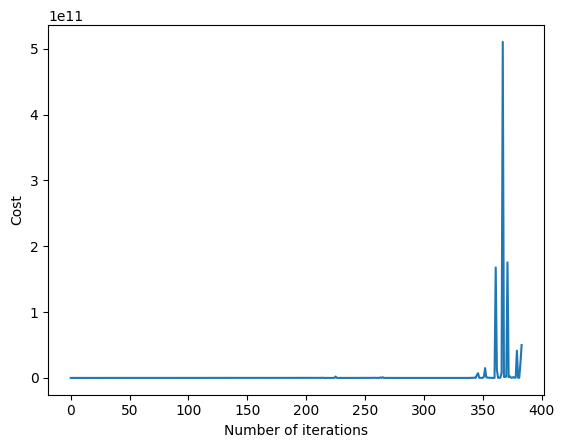

In [34]:
theta, error_list = gradientDescent(X_train, y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 

# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show() 


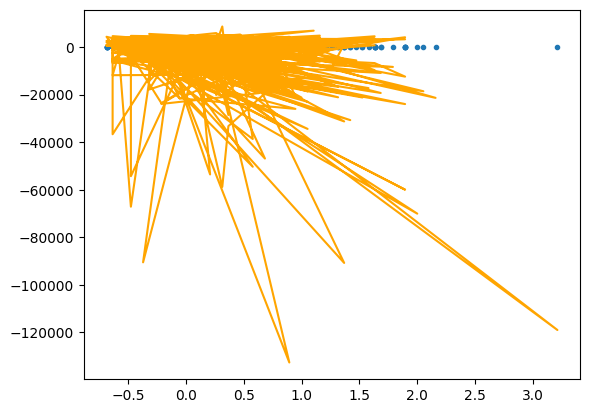

Mean absolute error =  7006.136542037177


In [35]:
# predicting output for X_test 
y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], y_pred, color = 'orange') 
plt.show() 

# calculating error in predictions 
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0]) 
print("Mean absolute error = ", error) 


# K-Nearest Neighbours 
 K-Nearest Neighbours - The K-Nearest Neighbour (KNN) classifiers are instance based supervised learning methods that classifies based on a similarity measure, like Euclidean, Mahanttan or Minkowski distance functions

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

sc_X = StandardScaler()
X_train = sc_X.fit_transform(x1_train)
X_test = sc_X.transform(x1_test)
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y1_train)
y_pred = classifier.predict(X_test)
#check accuracy
accuracy = metrics.accuracy_score(y1_test, y_pred)
print('KNN Accuracy: ',accuracy)

KNN Accuracy:  0.7955555555555556


# Support Vector Machine (SVM)

Support Vector Machine (SVM) - SVM are used for supervised learning where the data is linearly classified
and analyzed.

In [37]:
print(len(x_train), len(x_test), len(y1_train), len(y_test))


25500 4500 25500 450


In [39]:
from sklearn import svm
regressor = svm.SVC()
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 5) 
regressor.fit(x1_train, y1_train)
y_pred = regressor.predict(x1_test)
y_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#print("Confusion Matrix: ",confusion_matrix(y_pred.round(),y_test))
accuracy = accuracy_score( y_pred.round(),y1_test)
print("Support Vector Machine Accuracy ",accuracy)

In [43]:
import pickle

pickle.dump(regressor, open('svm1.pkl', 'wb'))

In [52]:
import pickle

pickle.dump(regressor, open('svm1.pkl', 'wb'))
loaded_model = pickle.load(open('svm.pkl', 'rb'))
k=loaded_model.predict([[90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1000,1000,1000,5000,0,0,1,0,0,0]])
print(k)
if k==0:
    print("fraud transaction")
else:
    print("non-fraud transaction")

[0]
fraud transaction


# LinearDiscriminantAnalysis as LDA It classifies
LinearDiscriminantAnalysis as LDA It classifies instances by learning a mathematical non-linear quadratic decision boundary to differentiate instances of different classes.

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(x1_train, y1_train)
X_test = lda.transform(x1_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y1_test, y_pred)
print("Accuracy = ",accuracy)

Accuracy =  0.8186666666666667


In [82]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Dara preparation)
#default = pd.read_excel('UCI_Credit_Card.csv',skiprows=[0],index_col="ID")
default = pd.read_csv('UCI_Credit_Card.csv',index_col="ID")
default.rename(columns=lambda x: x.lower(), inplace=True)
default

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [83]:
default.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default.payment.next.month'],
      dtype='object')

In [85]:
X=default[['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']]
y=default['default.payment.next.month']

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y,train_size=0.8,random_state=21)
from sklearn.svm import SVC
model=SVC().fit(X_train,y_train)
y_pred=model.predict(X_test)

In [87]:
print(y_pred)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

[0 0 0 ... 0 0 0]


0.7876666666666666

In [88]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=250,n_jobs=10).fit(X_train,y_train)

In [89]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=250,n_jobs=10).fit(X_train,y_train)

train_pred = model_rf.predict(X_train)
acc=accuracy_score(y_train,train_pred)
print(acc)


y_pred=model_rf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc

0.9994166666666666


0.9666666666666667

In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
#check accuracy
accuracy =accuracy_score(y_test, y_pred)
print('KNN Accuracy: ',accuracy)

KNN Accuracy:  0.8045833333333333


In [91]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred
acc=accuracy_score(y_pred,y_test)
acc

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7874166666666667

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [93]:
from sklearn.linear_model import LogisticRegressionCV
classifier=LogisticRegressionCV().fit(X_train,y_train) 
y_pred=classifier.predict(X_test)
y_pred
acc=accuracy_score(y_pred,y_test)
acc

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

0.7875

In [94]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier().fit(X_train,y_train) 
y_pred=classifier.predict(X_test)
y_pred
acc=accuracy_score(y_pred,y_test)
acc

0.8045833333333333

In [95]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=250,n_jobs=10).fit(X_train,y_train)
y_pred=model_rf.predict(X_test)
print(y_pred)
acc=accuracy_score(y_test,y_pred)
acc

[0 1 0 ... 1 1 0]


0.9656666666666667

In [97]:
X_train

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
ID,,,,,,,,,,,,,,,,,,,,,
27442,300000.0,1,2,2,38,1,-1,3,2,-1,...,780.0,390.0,390.0,390.0,1560.0,0.0,0.0,390.0,390.0,540.0
6167,30000.0,2,2,1,27,0,0,2,2,0,...,13225.0,12718.0,12829.0,13083.0,3000.0,901.0,0.0,465.0,467.0,485.0
25425,200000.0,2,1,2,31,-2,-2,-2,-2,-2,...,1295.0,0.0,0.0,0.0,165.0,1295.0,0.0,0.0,0.0,0.0
27629,70000.0,2,3,2,24,0,0,0,-1,0,...,11026.0,2342.0,2390.0,0.0,2000.0,1000.0,2342.0,48.0,0.0,0.0
18309,150000.0,2,2,1,53,-1,-1,-1,-1,-1,...,508.0,9634.0,3822.0,1769.0,5336.0,509.0,9636.0,3822.0,1779.0,1017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16433,120000.0,2,3,2,50,2,0,-1,0,0,...,118675.0,120047.0,100637.0,79613.0,3000.0,125000.0,4065.0,4000.0,3000.0,3000.0
8965,50000.0,1,1,1,34,0,0,0,0,0,...,16235.0,17035.0,15601.0,16349.0,2115.0,2000.0,2022.0,1000.0,1000.0,2000.0
5945,290000.0,2,1,2,31,0,0,0,0,0,...,15315.0,14199.0,9681.0,162.0,1380.0,1212.0,284.0,5000.0,162.0,380.0


In [100]:
import pickle

pickle.dump(model_rf, open('rf_model.pkl', 'wb'))
loaded_model = pickle.load(open('rf_model.pkl', 'rb'))
k=loaded_model.predict([[60000,2,2,1,45,0,0,0,0,-1,-1,60244,59868,58221,16305,3124,29484,3000,2577,1525,3124,29484,1326]])
m=loaded_model.predict([[80000,2,3,1,48,-1,-1,2,-1,-1,-1,396,792,396,792,0,396,792,0,792,0,396,546]])

print(k)
if k==0:
    print("fraud transaction")
else:
    print("non-fraud transaction")

print(m)
if m==0:
    print("fraud transaction")
else:
    print("non-fraud transaction")

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]
fraud transaction
[1]
non-fraud transaction
